## Graph Measures & Network Structure

1. Degree Centrality: The Popular Kid

The number of direct connections a node has. it's useful for measuring exposure to whatever is flowing through the network (like a virus or gossip).
> Limitation: A node can have a high degree but be completely isolated from another part of the network. The "popular kid" in school A has no influence in school B.

2. Betweenness Centrality: The Bridge or The Gatekeeper

How often a node acts as a "bridge" along the shortest path between two other nodes. This helps to identify potential single points of failure. If you remove a high-betweenness node, you might fracture the network into disconnected clusters.
> A node's betweenness is not about itself, but about its position relative to everyone else.

3. Closeness Centrality: The Efficient Communicator

The average length of the shortest path from a node to all other nodes in the network. (A higher score means they are closer to everyone). For a rumor mill, this person might be the best one to start the rumor if you want it to spread everywhere fast.

4. Eigenvector Centrality: The Influential Connector

Not just how many connections you have, but how well-connected your connections are. It's a measure of being connected to other important nodes. This is the core idea behind the Google PageRank algorithm. A website is important if other important websites link to it. In social networks, it identifies the truly "influential" people, not just the popular ones.

<br>

### **Local Measures:** The "My Neighborhood" View

The Champion: Degree Centrality

### **Global Measures:** The "Big Picture" View

These measures require knowledge of the entire network's structure to compute. The two prime examples are Betweenness and Closeness. (Eigenvector is a special case )

<br>

Eigenvector centrality blend—it's a local measure with a global conscience:
- It's "Local" in calculation: A node's score is a direct function of its neighbors' scores. It's recursive: My Score = Sum of my Neighbors' Scores.

- It's "Global" in effect: Because the formula is recursive, your score depends on your neighbors' scores, which depend on their neighbors' scores, and so on. This means a node's score is ultimately influenced by the structure of the entire network.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

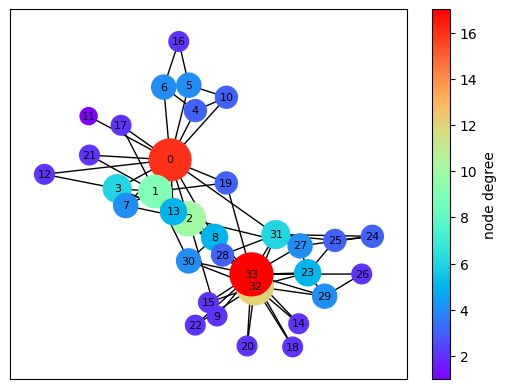

In [ ]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed = 42)
color = list(dict(G.degree()).values())
size = [s * 50 + 100 for s in color]

nodes = nx.draw_networkx_nodes(G, pos, node_color=color, node_size=size, cmap='rainbow')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='node degree')
plt.show()

In [90]:
def graph_measures(G):
    return{
        'degree_centrality': nx.degree_centrality(G),
        'betweenness_centrality': nx.betweenness_centrality(G),
        'closeness_centrality': nx.closeness_centrality(G),
        'eigenvector_centrality': nx.eigenvector_centrality(G),
        'pagerank': nx.pagerank(G)

    }

In [91]:
measures = graph_measures(G)
for k, v in measures.items():
    v = sorted(v.items(), key = lambda x: x[1], reverse=True)[:3]
    print(f'{k}: {v}')

degree_centrality: [(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365)]
betweenness_centrality: [(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114)]
closeness_centrality: [(0, 0.5689655172413793), (2, 0.559322033898305), (33, 0.55)]
eigenvector_centrality: [(33, 0.37337121301323506), (0, 0.35548349418519426), (2, 0.3171893899684447)]
pagerank: [(33, 0.09698041880501741), (0, 0.08850807396280012), (32, 0.07592643687005646)]


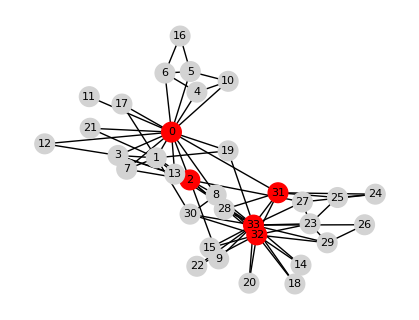

In [123]:
top_nodes = sorted(measures['betweenness_centrality'].items(), key=lambda x:x[1], reverse=True)[:5]
top_nodes = [n for n,_ in top_nodes]

plt.figure(figsize=(4, 3))
colors = ['red' if n in top_nodes else 'lightgray' for n in G.nodes()]
nx.draw(G, pos, with_labels = True , node_color=colors, node_size=200, font_size=8)

### Relationship between shortest paths, clustering, and network resilience.

1. Shortest Paths: The minimum number of steps required to get from one node to another. This defines the "efficiency" of a network.

2. Clustering: The tendency for nodes to form tight-knit groups. It's measured by how likely your friends are to also be friends with each other. This creates "local density."

3. Network Resilience: The ability of a network to maintain its connectivity and function when nodes or links are removed.

<br>

The "Spoke-and-Hub" Network (Low Clustering): Shortest paths are minimized at the cost of resilience, enabled by low clustering.

The "Tight-Knit Community" Network (High Clustering): Resilience is high, but at the cost of longer shortest paths, enabled by high clustering.

<br>

Most real-world networks (social, biological, neural) cleverly balance these two extremes. They are called Small-World Networks.
- High Clustering (like the tight-knit community).
- Short Average Path Lengths (like the spoke-and-hub system).

<br>

 - shortest_path_length between two nodes: `nx.shortest_path_length(G, u, v)`
 - global_avg: `nx.average_shortest_path_length(G)`

1. Relative Path Length (shortest_path_length / global_avg)
    - `> 1.0`: These nodes are less connected than average (path is longer than typical)
    - `= 1.0`: These nodes have average connectivity
    - `< 1.0`: These nodes are better connected than average (path is shorter than typical)

2. Connectivity Efficiency (global_avg / shortest_path_length)

In [92]:
nx.transitivity(G) # It measures the overall probability that adjacent nodes of a node are connected.

0.2556818181818182

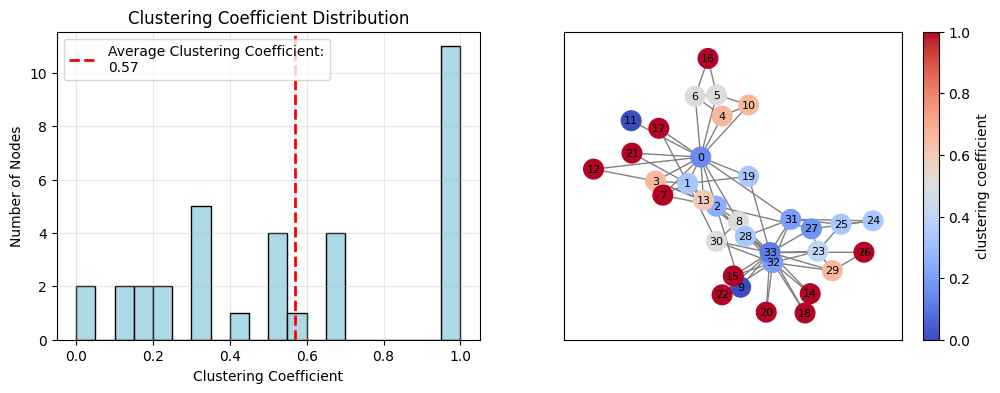

In [ ]:
clusters = nx.clustering(G)
cluster_values = list(clusters.values())
avg_clusters = np.mean(cluster_values)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(cluster_values, bins=20, color='lightblue', edgecolor='black')
plt.axvline(avg_clusters, color='red', linestyle='dashed', linewidth=2,
            label=f'Average Clustering Coefficient:\n{avg_clusters:.2f}')
plt.legend()
plt.xlabel('Clustering Coefficient')
plt.ylabel('Number of Nodes')
plt.title('Clustering Coefficient Distribution')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
nodes = nx.draw_networkx_nodes(G, pos, node_color=cluster_values, node_size=200, cmap='coolwarm')
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label='clustering coefficient')

plt.show()

## Community Detection

A community or module in a network is a group of nodes that feel more like "us" and less like "them."n network terms, this "us vs. them" structure has two defining characteristics:
1. High Internal Cohesion (The "Us"): This is often measured by High Density or High Clustering Coefficient within the group. There are many "triangles" of connections (your friends are also friends with each other).
2. Low External Connection (The "Them"): This is often measured by Low Cut Size or High Modularity. The "cut size" is the number of links you would have to sever to completely separate this community from the rest of the network.

<br>

### Why we want to find communities:
1. Function Identification: In a protein interaction network, a community might represent a group of proteins that work together to perform a specific biological function (like digesting sugar).
2. Vulnerability Analysis: In the internet, a community might be a internet service provider (ISP). If the few connections between ISPs fail, the internet can fragment.
3. Recommendation Systems: In a social network, if we know you're in the "Indie Music Fans" community, we can recommend new bands that other people in that same community like.
4. Disease Spread: In an epidemic, a tightly-knit community (like a school) can become a hotspot, while the bridges between communities (like a teacher who works at two schools) can spread the disease to new groups.

<br>
<br>

### how we find those communities:
- Hierarchical: "Let's build a family tree of groups."
- Modularity-based: "Let's find the grouping that feels the most 'us vs. them'."
- Propagation-based: "Let the rumor mill decide who's in which group."

<br>

#### **1. Hierarchical Methods: The "Family Tree" or "Russian Doll" Approach**

We build a tree of communities. Smaller, tight-knit groups nest inside larger, looser groups, like a set of Russian dolls.
- Divisive (Top-Down)
- Agglomerative (Bottom-Up)

The Output is a **dendrogram** (a tree diagram) that shows you the complete hierarchy of how every group fits inside every other group.
> The Limitation: It gives you a structure, but it doesn't tell you which level of the tree is the "best" grouping. You have to decide where to cut the tree.

#### **2. Modularity-Based Methods: The "Scorekeeper" Approach**

We define a mathematical score called Modularity (Q) that measures how good a particular grouping is. The algorithm's job is to find the grouping that maximizes this score.

```raw
What is Modularity (Q)? In simple terms, it's a number that compares:
    - The number of connections inside your proposed communities
    - The number of connections you would expect to see inside those same communities if the network were random
A high Modularity score means you've found a grouping where the "us vs. them" feeling is very strong—there are far more connections within groups than you'd expect by chance.
```
> The Limitation: It can struggle to find very small communities in a large network (the "resolution limit" problem). It's like the judge might miss a tiny, ultra-tight friend group of 3 people because the giant group of 100 is dominating the score.

#### **3. Propagation-Based Methods: The "Gossip" or "Label Spreading" Approach**

We let the local connections "vote" on what community a node should belong to. It's a dynamic, fluid process. This method is famously used in the **Louvain algorithm**, which is one of the fastest and most effective community detection methods.
> The final result can sometimes depend on where you started the "rumors" (it's non-deterministic). You might get slightly different results if you run it multiple times.

<br>

### accuracy vs. scalability.

Accuracy (Precision): How correct and meaningful the result is. Does the algorithm find the true, optimal communities? Does it capture the nuances and complexities of the network?

Scalability (Performance): How efficiently the algorithm runs as the network gets larger (more nodes) and denser (more edges). We often measure this by how the computation time grows—e.g., does doubling the network size quadruple the time, or make it 10x worse?

> The Inevitable Trade-off: As accuracy increases, scalability decreases, and vice-versa.

### Algorithms

#### **1. Greedy Modularity Maximization**

- The Algorithm: Clauset-Newman-Moore (CNM) Greedy Modularity
- The Idea: The Merger Strategy

→ Every node is in its own community<br>
→ Systematically find the single merger of two communities that results in the biggest increase in the Modularity (Q) score<br>
→ Repeat until no merger improves Q.

> `communities = list(nx.community.greedy_modularity_communities(G))` → Returns A list of sets, where each set contains the nodes in one community.

> Best for: Medium-sized networks where you want a good modularity score without the cost of a full hierarchical analysis.

> Trade-off: Faster than checking all possible partitions, but it's a "greedy" algorithm—it makes the locally optimal choice at each step without backtracking, so it can get stuck in a good-but-not-perfect solution.

<br>
<br>

#### **2. Girvan–Newman Algorithm**

- The Idea: The Divider Strategy

→ The whole network is one community<br>
→ Calculate edge betweenness centrality for all edges<br>
→ Remove the edge with the highest betweenness<br>
→ Recalculate betweenness for the remaining edges<br>
→ Repeat until no edges remain.

Output: A dendrogram showing the entire sequence of splits.
> `nx.community.girvan_newman(G)` Returns An iterator over tuples of community sets at each level of the split.

> Small networks where you want a clear, interpretable hierarchical structure and have time for heavy computation.

> Trade-off: Very intuitive and accurate, but extremely slow because it requires repeatedly recalculating edge betweenness. Doesn't scale well.

<br>
<br>

#### **3. Louvain Method**

- The Idea: The Two-Phase Optimizer

1. Local Moving:

    → Start with each node in its own community.<br>
    → For each node, try moving it to a neighbor's community. If it increases modularity, move it.<br>
    → Repeat until no moves improve modularity.<br>

2. Aggregation:

    → Collapse each found community into a single "super-node."<br>
    → The network of super-nodes is now your new graph.<br>
    → Go back to Phase 1 on this new, smaller graph.<br>

> `partition = community_louvain.best_partition(G)` Returns a dictionary mapping each node to its community ID.

> Best for: Very large networks. It's one of the most popular methods because it's incredibly fast and produces high-quality communities

> Trade-off: The gold standard for large-scale community detection. Excellent blend of speed and accuracy. Non-deterministic (can give slightly different results on different runs).

<br>
<br>

#### **4. Label Propagation Algorithm (LPA)**

- The Idea: The Gossip Mill

→ Give every node a unique "label" (its community ID).<br>
→ Shuffle the order of nodes.<br>
→ For each node, look at its neighbors' labels and adopt the label that is most frequent among them. <br>
→ Repeat until no node changes its label. <br>

Nodes with the same label form a community.

> `communities = list(nx.community.label_propagation_communities(G))` Returns a list of sets of nodes.

> Best for: Massive, massive networks where speed is the absolute priority. It's nearly linear time.

> Trade-off: Extremely fast but less accurate. The results can be somewhat random and depend on the initial shuffling. Communities can be "monster" sized. Use when you need any community structure fast, not necessarily the best one


<br>

Algorithm | Idea | NetworkX Function / Library
----------|------|---------------------------
Greedy Modularity | Greedy optimization of modularity | nx.community.greedy_modularity_communities(G)
Girvan–Newman | Edge removal by betweenness | nx.community.girvan_newman(G)
Louvain Method | Multi-level modularity optimization | community-louvain package (import community as community_louvain)
Label Propagation | Fast, random label spreading | nx.community.label_propagation_communities(G)


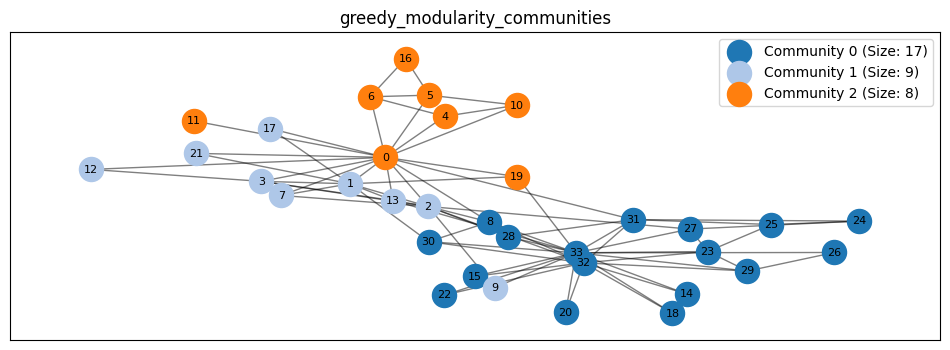

In [136]:
communities_greedy = list(nx.community.greedy_modularity_communities(G))
cmap = plt.cm.tab20  # Good for up to 20 distinct colors
colors = [cmap(i % 20) for i in range(len(communities_greedy))]

plt.figure(figsize=(12, 4))
for i, comm in enumerate(communities_greedy):
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(comm), node_color = colors[i], node_size=300, label = f'Community {i} (Size: {len(comm)})'
    )
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.legend(
    # bbox_to_anchor=(1.05, 1),
    loc='upper right'
)
plt.title('greedy_modularity_communities')
plt.show()

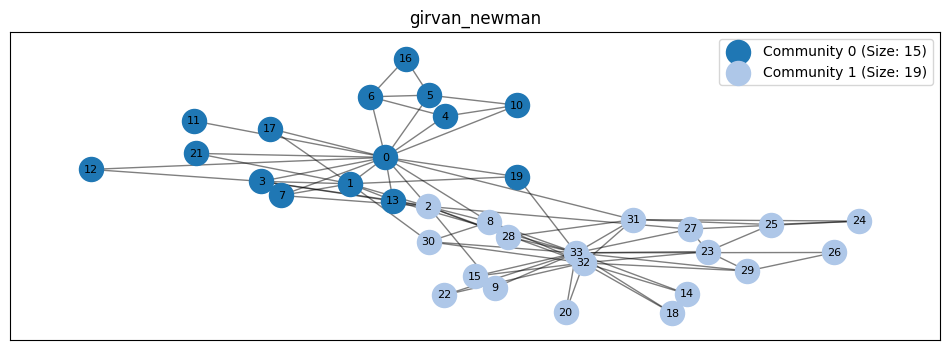

In [137]:
communities_girvan_newman = list(nx.community.girvan_newman(G))[0] #  first level
colors = [cmap(i % 20) for i in range(len(communities_girvan_newman))]

plt.figure(figsize=(12, 4))
for i, comm in enumerate(communities_girvan_newman):
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(comm), node_color = colors[i], node_size=300, label = f'Community {i} (Size: {len(comm)})'
    )
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.legend(
    # bbox_to_anchor=(1.05, 1),
    loc='upper right'
)
plt.title('girvan_newman')
plt.show()

In [138]:
import community as community_louvain


communities_louvain = community_louvain.best_partition(G)
comms_louvain = {}
for k, v in communities_louvain.items():
    comms_louvain[v] = comms_louvain.get(v, []) + [k]

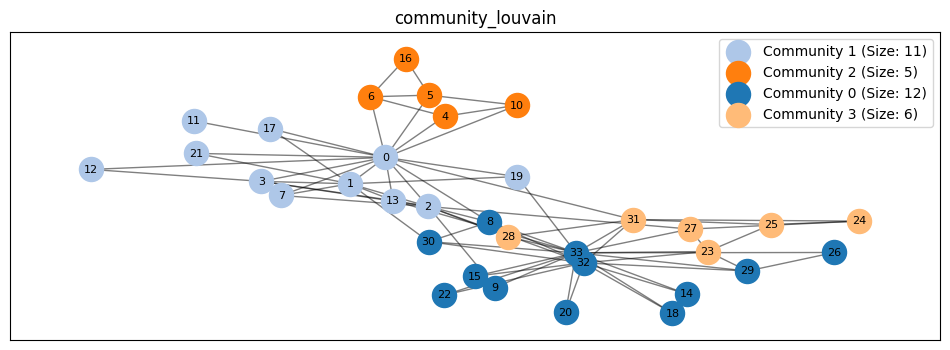

In [139]:
colors = [cmap(i % 20) for i in range(len(comms_louvain))]

plt.figure(figsize=(12, 4))
for i, comm in comms_louvain.items():
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(comm), node_color = colors[i], node_size=300, label = f'Community {i} (Size: {len(comm)})'
    )
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.legend(
    # bbox_to_anchor=(1.05, 1),
    loc='upper right'
)
plt.title('community_louvain')
plt.show()

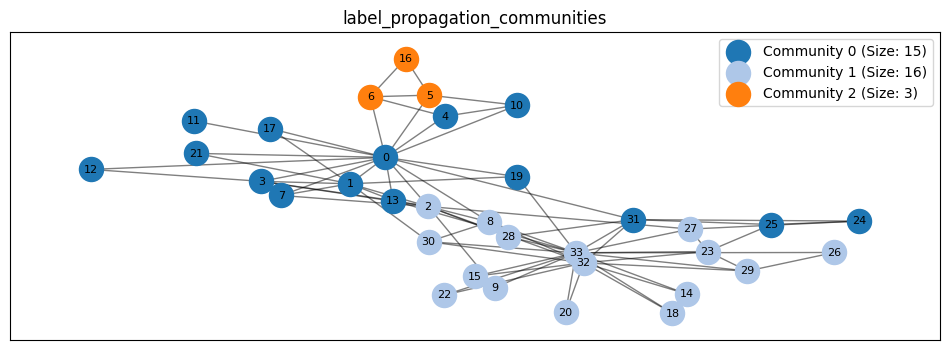

In [140]:
communities_propagation = list(nx.community.label_propagation_communities(G))
colors = [cmap(i % 20) for i in range(len(communities_propagation))]

plt.figure(figsize=(12, 4))
for i, comm in enumerate(communities_propagation):
    nx.draw_networkx_nodes(
        G, pos, nodelist=list(comm), node_color = colors[i], node_size=300, label = f'Community {i} (Size: {len(comm)})'
    )
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.legend(
    # bbox_to_anchor=(1.05, 1),
    loc='upper right'
)
plt.title('label_propagation_communities')
plt.show()

### Community Evaluation Metrics

When we evaluate community quality, we look through three different "lenses":
- **Internal Quality:** How tight-knit are the communities themselves?
- **External Quality:** How well-separated are the communities from each other?
- **Global Quality:** How good is the overall partition?

### Step 1: Global Quality - "How Good is the Overall Partition?"
- Modularity (Q): The Gold Standard: Higher is better
- Coverage: The "Purity" Measure: [0, 1] Higher is better
> $\frac{\text{Total within-community edges}}{\text{Total edges in network}}$

### Step 2: Internal Quality - "How Good Are the Communities Themselves?"
- Internal Density: The "Clique-ness" Measure: [0, 1] Higher is better
- Average Internal Degree: The "Activity Level": Higher is better
> $\frac{2 \times \text{internal edges}}{\text{number of nodes in community}}$

### Step 3: External Quality - "How Well-Separated Are the Communities?"
- Conductance: The "Leakiness" Metric: [0, 1] Lower is better
- Expansion: The "External Reach": Lower is better
> $\frac{\text{Edges leaving community}}{\text{Number of nodes in community}}$

> Neighborhood X: 100 homes, 10 roads to other neighborhoods → Conductance = 0.09, Expansion = 0.1<br>
Neighborhood Y: 100 homes, 40 roads to other neighborhoods → Conductance = 0.29, Expansion = 0.4

<br>

#### **1. Modularity (Q): The Global Scorekeeper**

The Core Idea: Modularity measures whether your communities have more connections within groups and fewer connections between groups than you'd expect by random chance.

\begin{equation}
Q = \frac{1}{2m} \sum_{ij} [A_{ij} - \frac{k_i k_j}{2m}] \delta(c_i, c_j)
\end{equation}

> $\frac{1}{2m}$: Normalize everything by the total number of connections <br>
$A_{ij}$: Are node i and node j actually connected? (1 = yes, 0 = no) <br>
$\frac{k_i k_j}{2m}$: What's the probability they'd be connected by random chance? (This is the null model)<br>
$A_{ij} - \frac{k_i k_j}{2m}$: Is this connection more (positive) or less (negative) than we'd expect by chance? <br>
$\delta(c_i, c_j)$: But only count this if nodes i and j are in the same community

- Q = 0: Your community structure is no better than a random grouping. The network is essentially one big blob.
- Q > 0: You have meaningful community structure. The higher the Q, the stronger the "us vs. them" pattern.
- Q < 0: You actually have fewer within-community connections than expected by chance (this is rare).

>Comparing different community detection algorithms on the same network.<br>
Tuning parameters of an algorithm to find the best Q.<br>
As a stopping criterion in hierarchical clustering.<br>

<br>
<br>

#### **2. Conductance: The Local "Leakage" Meter**

Conductance measures how "leaky" a single community is. It quantifies how easily something (information, influence) can escape from the community to the outside world.
- Low Conductance: The community is well-sealed. Most connections stay inside. (Good community!)
- High Conductance: The community is leaky. Many connections go outside. (Poor community!)

\begin{equation}
Conductance = \frac{\text{Edges leaving community}}{\text{Total edges touching community}}
\end{equation}

> Numerator: How many members have friends outside the club? (leakage) <br>
Denominator: Total friendships that club members have (both inside AND outside)<br>
If a community has 100 internal edges and 10 edges to the outside, its conductance is 10/(100 + 10) ≈ 0.09 (very tight community!).

>Evaluating the quality of individual communities (not the whole partition).<br>
Finding "boundary spanners" or "bridge" nodes.<br>
Applications where community isolation matters (e.g., containing epidemics).<br>

<br>
<br>

#### **3. Density: The "Internal Cohesion" Gauge**

How tightly knit is this community internally? It measures what fraction of possible connections actually exist within the community.


\begin{split}
Density & = \frac{\text{Actual internal edges}}{\text{Possible internal edges}} \\
        & = \frac{\text{internal_edges}}{\frac{n * (n-1)}{2}}
\end{split}

> n: number of internal nodes

>Understanding the internal structure of individual communities.<br>
Differentiating between "cliques" (density ≈ 1.0) and "loose groups".<br>
Quality control: if a detected community has very low density, it might not be meaningfuf.<br>

<br>
<br>

#### **4. Coverage: The "Global Purity" Measure**

What fraction of all connections in the network are within communities?
- If Coverage = 1.0, every single edge is inside some community (no edges between communities)
- If Coverage = 0, all edges are between different communities

\begin{equation}
Coverage = \frac{\text{Total intra-community edges}}{\text{Total edges in network}}
\end{equation}

>Quick global assessment of community quality. <br>
Understanding the trade-off: very high coverage might mean you've put everything in one giant community!<br>

> Relationship with Modularity: Coverage only looks at the raw count, while Modularity is smarter—it compares against random chance.

<br>
<br>

#### **5. Performance: The "Ground Truth" Judge**

When you know the true communities, what fraction of node pairs did we classify correctly?

The Simple Explanation: It treats community detection as a classification problem for node pairs

\begin{equation}
Coverage = \frac{\text{Correctly classified pairs}}{\text{All possible pairs}}
\end{equation}

> Only when you have ground truth labels (e.g., known social circles, functional categories in biological networks). <br>
Benchmarking algorithms against known communities. <br>
Academic research and validation studies. <br>

<br>

1. Start with Modularity for a quick global assessment.
2. Drill down with Conductance and Density to check individual community quality.
3. Use Coverage to understand the edge distribution.
4. Use Performance only if you have the "answer key."



<br>

Metric | Description | Formula / Notes
-------|-------------|----------------|
Modularity (Q) | Fraction of intra-community edges minus expected | $Q = \frac{1}{2m} \sum_{ij} [A_{ij} - \frac{k_i k_j}{2m}] \delta(c_i, c_j)$
Conductance | Ratio of inter-community edges to total edges | Measures community “leakage”
Density | Internal edges / possible edges in community | Measures internal tightness
Coverage | Fraction of intra-community edges in total | Evaluates overall clustering
Performance | Fraction of correctly classified pairs | Used when ground truth exists


In [99]:
# communities_greedy
# communities_girvan_newman
# communities_louvain
# communities_propagation

In [100]:
comms_louvain = {}
for k, v in communities_louvain.items():
    comms_louvain[v] = comms_louvain.get(v, []) + [k]

In [101]:
from networkx.algorithms.community import modularity


# Phase 1: Quick Global Check
methods = {
    "Greedy": communities_greedy,
    "Girvan–Newman": communities_girvan_newman,
    "Louvain": comms_louvain.values(),
    "Label Propagation": communities_propagation
}

for name, comms in methods.items():
    print(f"{name:20s}: Modularity = {modularity(G, comms):.4f}")

Greedy              : Modularity = 0.4110
Girvan–Newman       : Modularity = 0.3477
Louvain             : Modularity = 0.4449
Label Propagation   : Modularity = 0.3095


In [87]:
# from networkx.algorithms.community.quality import modularity

# modularity_score = modularity(G, comms_louvain.values())
# print(f"Modularity: {modularity_score:.4f}")

In [ ]:
# Phase 2: Community-by-Community Analysis
community_metrics = []
for i, comm in enumerate(comms_louvain.values()):
    subG = G.subgraph(comm)

    # Global metirc
    internal_edges = subG.number_of_edges()
    coverage = internal_edges / G.number_of_edges() # Higher is better

    # Internal metrics
    n = len(comm) # Number of nodes in community: `subG.number_of_nodes()`
    possible_edges = n * (n - 1) / 2

    density = internal_edges / possible_edges if possible_edges > 0 else 0 # Higher is better
    avg_in_deg = 2 * internal_edges / n # Higher is better


    # External metrics
    total_degree = sum(d for _, d in G.degree(comm))
    cut_edges = total_degree - (2 * internal_edges) # Edges leaving community nx.cut_size(G, comm)

    conductance = cut_edges / total_degree if total_degree > 0 else 0 # Lower is better
    Expansion = cut_edges / n # Lower is better

    community_metrics.append({
        'community_id': i,
        'size': n,
        'coverage': coverage,
        'density': density,
        'Avg Internal Degree': avg_in_deg,
        'conductance': conductance,
        'Expansion': Expansion,
        'internal_edges': internal_edges,
        'cut_edges': cut_edges
    })

pd.DataFrame(community_metrics).map(lambda x: round(x, 3))

,community_id,size,coverage,density,Avg Internal Degree,conductance,Expansion,internal_edges,cut_edges
0,0,11,0.295,0.418,4.182,0.233,1.273,23,14
1,1,5,0.077,0.600,2.400,0.250,0.800,6,4
2,2,12,0.269,0.318,3.500,0.250,1.167,21,14
3,3,6,0.090,0.467,2.333,0.417,1.667,7,10
